In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matrixprofile.discover import snippets
import pandas as pd
from pyts.image import RecurrencePlot
import tensorflow as tf
import json
from sklearn.model_selection import train_test_split
from scipy.ndimage.interpolation import zoom


In [2]:
df = pd.read_csv('lstm.csv',converters={"data":lambda x: np.array(json.loads(x)),
                                       "snippet":lambda x: np.array(json.loads(x))})
print(df["idx"].unique())
df["class"]=df["class"].apply(lambda x: np.full(300, x))

[0 2 1]


In [3]:
X=np.stack(df[["snippet","data","class"]].apply(lambda x: np.stack(x.values),axis=1))
y=df.true.values.reshape(-1,1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [5]:
from keras.layers import TimeDistributed
from keras.layers import Reshape
from keras.layers import Conv2D,Lambda, Activation, LSTM
from keras.utils import to_categorical
from keras.models import Model,Input
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape,GlobalAveragePooling2D,AveragePooling2D
from keras import backend as K
from tensorflow.keras.layers import GRU,Reshape,Dropout

In [6]:
def get_model():
    model = Sequential()
    input_layer = Input((300, 1),name="img_input",dtype='float32')
    output = GRU(128, kernel_initializer='he_normal',  activation='relu')(input_layer)
    output = Dropout(0.2)(output)
    output = Dense(1)(output)    
    model = Model(inputs=input_layer, outputs=output)
    model.summary() 
    model.compile(loss="mse", optimizer="adam")
    
    return model

def get_model_snippet():
    model = Sequential()
    input_layer = Input((300,2),name="img_input",dtype='float32')
    output = GRU(128, kernel_initializer='he_normal',  activation='relu')(input_layer)
    output = Dropout(0.2)(output)
    output = Dense(1)(output)    
    model = Model(inputs=input_layer, outputs=output)
    model.summary() 
    model.compile(loss="mse", optimizer="adam")
    return model
    

def get_model_class():
    model = Sequential()
    input_layer = Input((301,1),name="img_input",dtype='float32')
    output = GRU(128, kernel_initializer='he_normal',  activation='relu')(input_layer)
    output = Dropout(0.2)(output)
    output = Dense(1)(output)    
    model = Model(inputs=input_layer, outputs=output)
    model.summary() 
    model.compile(loss="mse", optimizer="adam")
    return model
    
    return model
model = get_model()
model_snippet = get_model_snippet()
model_class = get_model_class()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 300, 1)]          0         
_________________________________________________________________
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 300, 2)]          0         
________________________________________

In [7]:
histor = model.fit(X_train[:,1],
          y_train,
          validation_data=(X_valid[:,1],y_valid),
          #callbacks=[learning_rate_reduction], 
          batch_size=25, epochs=50)

Epoch 1/50
121/121 [==============================] - 15s 110ms/step - loss: 6.4241 - val_loss: 2.5002
Epoch 2/50
121/121 [==============================] - 13s 110ms/step - loss: 3.4381 - val_loss: 2.5702
Epoch 3/50
121/121 [==============================] - 12s 99ms/step - loss: 2.9041 - val_loss: 2.1437
Epoch 4/50
121/121 [==============================] - 12s 100ms/step - loss: 2.3830 - val_loss: 2.2501
Epoch 5/50
121/121 [==============================] - 12s 99ms/step - loss: 2.3011 - val_loss: 1.8440
Epoch 6/50
121/121 [==============================] - 12s 99ms/step - loss: 1.9238 - val_loss: 1.7796
Epoch 7/50
121/121 [==============================] - 12s 102ms/step - loss: 1.9019 - val_loss: 1.7606
Epoch 8/50
121/121 [==============================] - 13s 104ms/step - loss: 1.7043 - val_loss: 1.6785
Epoch 9/50
121/121 [==============================] - 13s 104ms/step - loss: 1.8078 - val_loss: 1.8705
Epoch 10/50
121/121 [==============================] - 12s 103ms/step - loss

In [9]:

histor_snipp = model_snippet.fit(X_train[:,0:2].reshape(-1,300,2),
          y_train,
          validation_data=(X_valid[:,0:2].reshape(-1,300,2),y_valid),
          #callbacks=[learning_rate_reduction], 
          batch_size=25, epochs=50)

Epoch 1/50
121/121 [==============================] - 13s 102ms/step - loss: 8.9353 - val_loss: 2.7763
Epoch 2/50
121/121 [==============================] - 12s 101ms/step - loss: 3.8501 - val_loss: 2.5612
Epoch 3/50
121/121 [==============================] - 12s 102ms/step - loss: 3.1046 - val_loss: 2.1788
Epoch 4/50
121/121 [==============================] - 12s 102ms/step - loss: 2.7614 - val_loss: 1.9981
Epoch 5/50
121/121 [==============================] - 12s 102ms/step - loss: 2.6180 - val_loss: 1.9778
Epoch 6/50
121/121 [==============================] - 12s 101ms/step - loss: 2.2796 - val_loss: 1.9807
Epoch 7/50
121/121 [==============================] - 12s 101ms/step - loss: 2.0914 - val_loss: 1.8453
Epoch 8/50
121/121 [==============================] - 12s 101ms/step - loss: 1.9008 - val_loss: 1.6785
Epoch 9/50
121/121 [==============================] - 12s 101ms/step - loss: 1.7990 - val_loss: 1.6983
Epoch 10/50
121/121 [==============================] - 12s 101ms/step - l

In [8]:
X_train[:,0:2].shape

(3007, 2, 300)

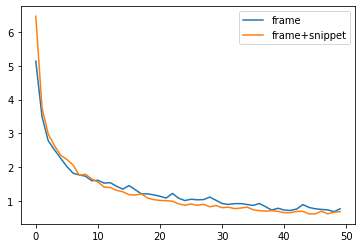

In [10]:
plt.plot(histor.history["loss"],label="frame")
plt.plot(histor_snipp.history["loss"],label="frame+snippet")
#plt.plot(histor_class.history["val_loss"],label="frame+class")
plt.legend()

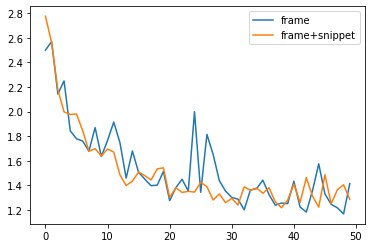

In [11]:
plt.plot(histor.history["val_loss"],label="frame")
plt.plot(histor_snipp.history["val_loss"],label="frame+snippet")
#plt.plot(histor_class.history["val_loss"],label="frame+class")

plt.legend()

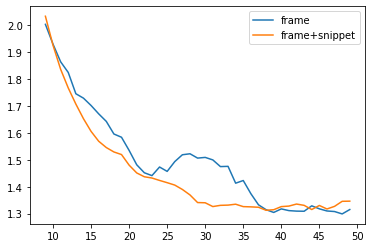

In [14]:
plt.plot(pd.DataFrame(histor.history["val_loss"]).rolling(window=1*10).mean(),label="frame")
plt.plot(pd.DataFrame(histor_snipp.history["val_loss"]).rolling(window=1*10).mean(),label="frame+snippet")
#plt.plot(histor_class.history["val_loss"],label="frame+class")

plt.legend()

In [12]:
from sklearn.metrics import mean_absolute_error
print("mae frame: ",mean_absolute_error(y_test, model.predict(X_test[:,1])))
print("mae frame_snippet: ",mean_absolute_error(y_test, model_snippet.predict(X_test[:,0:2].reshape(-1,300,2))))

mae frame:  0.7207164108651414
mae frame_snippet:  0.7226427172010993


In [16]:
from sklearn.metrics import mean_squared_error
print("mse frame: ",mean_squared_error(y_test, model.predict(X_test[:,1])))
print("mse frame_snippet: ",mean_squared_error(y_test, model_snippet.predict(X_test[:,0:2].reshape(-1,300,2))))

mse frame:  1.693018951303746
mse frame_snippet:  1.542489515404029
